<a href="https://colab.research.google.com/github/attackgnome/TensorFlowCourses/blob/master/C3/W4/assignment/C3_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.9MB/s]


In [11]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 10, 100)           321100    
                                                                 
 bidirectional_3 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1605)              162105    
                                                                 
 dense_3 (Dense)             (None, 3211)              5156866   
                                                      

In [14]:
 earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto')
 history = model.fit(predictors, label, epochs=100, verbose=1, callbacks = [earlystop])

Epoch 1/100
484/484 [==============================] - 15s 31ms/step - loss: 4.8177 - accuracy: 0.1158
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 4.7025 - accuracy: 0.1231
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 4.5949 - accuracy: 0.1345
Epoch 4/100
484/484 [==============================] - 13s 26ms/step - loss: 4.4852 - accuracy: 0.1427
Epoch 5/100
484/484 [==============================] - 13s 26ms/step - loss: 4.3747 - accuracy: 0.1568
Epoch 6/100
484/484 [==============================] - 12s 26ms/step - loss: 4.2708 - accuracy: 0.1680
Epoch 7/100
484/484 [==============================] - 12s 26ms/step - loss: 4.1593 - accuracy: 0.1842
Epoch 8/100
484/484 [==============================] - 12s 26ms/step - loss: 4.0501 - accuracy: 0.2000
Epoch 9/100
484/484 [==============================] - 13s 26ms/step - loss: 3.9450 - accuracy: 0.2133
Epoch 10/100
484/484 [==============================] - 13s 26ms/step - l

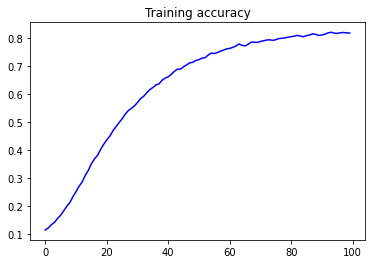

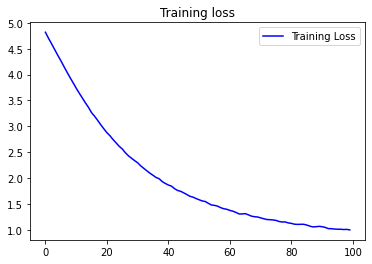

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1) # model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope or happy some die so sun blind eye shall view be rare rare express'd live or so taste spite as mother men care doth either's breast guest night a antique rhyme guest ' doth grew short crime miss'd near fangled ill day be away dost ranged strive to be alone go and lie of thee now be thee now seem bold twain twain lie dear eye blind eye than mine eye prove thee dost be so better still ' doth prove young forth die twain twain friend of long forth pleasure shame as now stay doth lose one lie as
